In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import numpy as np
import pandas as pd
import os

## Download the Data

In [4]:
if not os.path.isfile("telco-churn.csv"):
    !wget -O telco-churn.csv "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Data Preparation
1. make sure all column are read correctly
1. handle missing values 
1. check target variable is in right format

In [5]:
df = pd.read_csv("telco-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [8]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
categorical_columns

Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges',
       'churn'],
      dtype='object')

In [9]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [10]:
df.dtypes
#total charges should be numeric
df.totalcharges = pd.to_numeric(df['totalcharges'], errors='coerce') #change to number and set invalid to NaN
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [11]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [12]:
df[df.totalcharges.isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no_phone_service,no,no,yes,no_phone_service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no_internet_service,yes,no_internet_service,yes,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no,yes


In [13]:
df.totalcharges = df.totalcharges.fillna(0)

In [14]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Change target varible to numeric

In [15]:
df['churn'] = df.churn.map({'yes': 1, 'no': 0})
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

## Validation Framework

In [16]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [17]:
df_train = df_train.reset_index(drop=True)
y_train = df_train.churn
del df_train['churn']

df_val = df_val.reset_index(drop=True)
y_val = df_val.churn
del df_val['churn']

df_test = df_test.reset_index(drop=True)
y_test = df_test.churn
del df_test['churn']

## EDA

In [18]:
# check for missing values 
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
# check target variable stat 
churn = pd.DataFrame([], columns=['count', 'rate'])
churn['count'] = df_full_train.churn.value_counts() 
churn['rate'] = np.round(df.churn.value_counts(normalize=True) * 100, 2)
churn

,count,rate
0,4113,73.46
1,1521,26.54


In [20]:
# calculate mean gives churn rate  
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

### check numeric and categorical variables

In [21]:
numerical =  ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

## check nunique for categorical variables

In [22]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance with difference and risk ratio

In [23]:
from IPython.display import display
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['risk'] = df_group['mean'] / global_churn_rate
    df_group['difference'] = df_group['mean'] - global_churn_rate
    df_group = df_group.reset_index()
    print(c)
    display(df_group)
    print(end='\n\n')


gender


,gender,mean,count,risk,difference
0,female,0.276824,2796,1.025396,0.006856
1,male,0.263214,2838,0.974980,-0.006755




seniorcitizen


,seniorcitizen,mean,count,risk,difference
0,0,0.242270,4722,0.897403,-0.027698
1,1,0.413377,912,1.531208,0.143409




partner


,partner,mean,count,risk,difference
0,no,0.329809,2932,1.221659,0.059841
1,yes,0.205033,2702,0.759472,-0.064935




dependents


,dependents,mean,count,risk,difference
0,no,0.313760,3968,1.162212,0.043792
1,yes,0.165666,1666,0.613651,-0.104302




phoneservice


,phoneservice,mean,count,risk,difference
0,no,0.241316,547,0.893870,-0.028652
1,yes,0.273049,5087,1.011412,0.003081




multiplelines


,multiplelines,mean,count,risk,difference
0,no,0.257407,2700,0.953474,-0.012561
1,no_phone_service,0.241316,547,0.893870,-0.028652
2,yes,0.290742,2387,1.076948,0.020773




internetservice


,internetservice,mean,count,risk,difference
0,dsl,0.192347,1934,0.712482,-0.077621
1,fiber_optic,0.425171,2479,1.574895,0.155203
2,no,0.077805,1221,0.288201,-0.192163




onlinesecurity


,onlinesecurity,mean,count,risk,difference
0,no,0.420921,2801,1.559152,0.150953
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.153226,1612,0.567570,-0.116742




onlinebackup


,onlinebackup,mean,count,risk,difference
0,no,0.404323,2498,1.497672,0.134355
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.217232,1915,0.804660,-0.052736




deviceprotection


,deviceprotection,mean,count,risk,difference
0,no,0.395875,2473,1.466379,0.125907
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.230412,1940,0.853480,-0.039556




techsupport


,techsupport,mean,count,risk,difference
0,no,0.418914,2781,1.551717,0.148946
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.159926,1632,0.592390,-0.110042




streamingtv


,streamingtv,mean,count,risk,difference
0,no,0.342832,2246,1.269897,0.072864
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.302723,2167,1.121328,0.032755




streamingmovies


,streamingmovies,mean,count,risk,difference
0,no,0.338906,2213,1.255358,0.068938
1,no_internet_service,0.077805,1221,0.288201,-0.192163
2,yes,0.307273,2200,1.138182,0.037305




contract


,contract,mean,count,risk,difference
0,month-to-month,0.431701,3104,1.599082,0.161733
1,one_year,0.120573,1186,0.446621,-0.149395
2,two_year,0.028274,1344,0.104730,-0.241694




paperlessbilling


,paperlessbilling,mean,count,risk,difference
0,no,0.172071,2313,0.637375,-0.097897
1,yes,0.338151,3321,1.252560,0.068183




paymentmethod


,paymentmethod,mean,count,risk,difference
0,bank_transfer_(automatic),0.168171,1219,0.622928,-0.101797
1,credit_card_(automatic),0.164339,1217,0.608733,-0.105630
2,electronic_check,0.455890,1893,1.688682,0.185922
3,mailed_check,0.193870,1305,0.718121,-0.076098


## Feature importance: mutual info score

measures how much we know about a variable when given a second variable

works for categorical variables

In [24]:
from sklearn.metrics import mutual_info_score

def churn_mutual_info_score(series, df=df_full_train):
    return mutual_info_score(series, df.churn)

churn_mutual_info_score = df_full_train[categorical].apply(churn_mutual_info_score)
churn_mutual_info_score.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: correlation

In [25]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [26]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## One hot encoding

In [27]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

X_train.shape, X_val.shape

((4225, 45), (1409, 45))

## Train model, predict and measure accuracy 

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
churn_predictions = y_pred >= 0.5

In [29]:
accuracy = (churn_predictions == y_val).mean()
round(accuracy, 2)

0.8

## Using the model

### Train model with full dataset

In [30]:
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train_dicts) 
y_full_train = df_full_train.churn
test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)


model = LogisticRegression()
model.fit(X_full_train, y_full_train)
churn_prediction = model.predict_proba(X_test)[:, 1] >= 0.5
(churn_prediction  == y_test).mean()

0.815471965933286

### Test model

In [31]:
customer = df_test.iloc[10]
customer

customerid              0111-klbqg
gender                        male
seniorcitizen                    1
partner                        yes
dependents                     yes
tenure                          32
phoneservice                   yes
multiplelines                   no
internetservice        fiber_optic
onlinesecurity                  no
onlinebackup                   yes
deviceprotection                no
techsupport                     no
streamingtv                    yes
streamingmovies                yes
contract            month-to-month
paperlessbilling               yes
paymentmethod         mailed_check
monthlycharges               93.95
totalcharges               2861.45
Name: 10, dtype: object

In [32]:
customer_dict = customer.to_dict()
customer_dict


{'customerid': '0111-klbqg',
 'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'tenure': 32,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [33]:
x_custom = dv.transform(customer_dict)
x_custom

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [34]:
model.predict_proba(x_custom)[:, 1] >= 0.5

array([False])

In [35]:
y_test[10]

0

## Evaluation Metrics for classification 

1. Accuracy: not reliable when there is class imbalance

0.00 | 0.247
------------
0.05 | 0.480
------------
0.10 | 0.603
------------
0.15 | 0.674
------------
0.20 | 0.707
------------
0.25 | 0.746
------------
0.30 | 0.771
------------
0.35 | 0.778
------------
0.40 | 0.791
------------
0.45 | 0.803
------------
0.50 | 0.815
------------
0.55 | 0.819
------------
0.60 | 0.814
------------
0.65 | 0.806
------------
0.70 | 0.800
------------
0.75 | 0.781
------------
0.80 | 0.766
------------
0.85 | 0.754
------------
0.90 | 0.753
------------
0.95 | 0.753
------------
1.00 | 0.753
------------


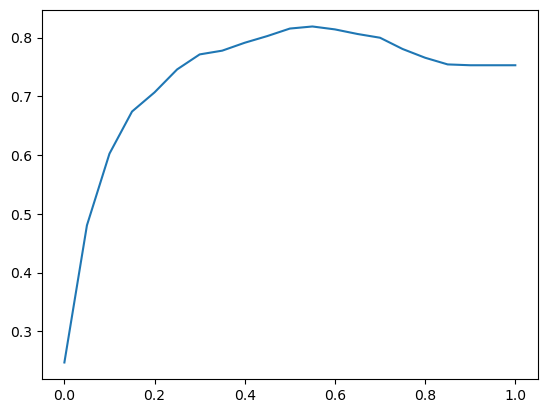

In [36]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

threshold = np.linspace(0,1, 21)
scores = []
for t in threshold:
    churn_prediction = model.predict_proba(X_test)[:, 1] >= t
    score = accuracy_score(y_test, churn_prediction)
    print("{:.2f} | {:4.3f}".format(t, score))
    print("-"*12)
    scores.append(score)

plt.plot(threshold, scores)

## Confusion Matrix

In [37]:
t = 0.5

actual_postive = y_val == 1
actual_negative = y_val == 0


predicted_positive = y_pred >= t
predicted_negative = y_pred < t

In [38]:
tn = (predicted_negative & actual_negative).sum()
tp = (predicted_positive & actual_postive).sum()
fn = (predicted_negative & actual_postive).sum()
fp = (predicted_positive & actual_negative).sum()

In [39]:
confussion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confussion_matrix

array([[922, 101],
       [176, 210]])

In [40]:
(confussion_matrix / confussion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## Precision
fraction of positive prediction that are correct 

In [41]:
precision = tp / (fp + tp)
precision

0.6752411575562701

## Recall

Fraction of number of postive prediction to total number of positive observation

In [42]:
recall = tp / (tp + fn)
recall

0.5440414507772021

## ROC: Receiver Operaing Characterics 

1. Plot a graph of FPR and TPR over multiple threshold
1. FPR = FP / (TN + FP)
1. TPR = TP / (TP + FN )

In [43]:
fpr = fp / (tn + fp)
tpr = tp / (tp + fn)
fpr, tpr

(0.09872922776148582, 0.5440414507772021)

In [50]:
def tpr_fpr_dataframe(y_val, y_pred):
    threshold = np.linspace(0,1,101)
    scores = []
    for t in threshold:
        actual_postive = y_val == 1
        actual_negative = y_val == 0


        predicted_positive = y_pred >= t
        predicted_negative = y_pred < t

        tn = (predicted_negative & actual_negative).sum()
        tp = (predicted_positive & actual_postive).sum()
        fn = (predicted_negative & actual_postive).sum()
        fp = (predicted_positive & actual_negative).sum()

        fpr = fp / (tn + fp)
        tpr = tp / (tp + fn)

        scores.append((t, tn, tp, fn, fp, fpr, tpr))

    df_roc = pd.DataFrame(scores, columns=['threshold', 'tn', 'tp', 'fn', 'fp', 'fpr', 'tpr'])
    return df_roc

df_roc = tpr_fpr_dataframe(y_val, y_pred)
df_roc[::10]                      

,threshold,tn,tp,fn,fp,fpr,tpr
0,0.0,0,386,0,1023,1.000000,1.000000
10,0.1,467,366,20,556,0.543500,0.948187
20,0.2,667,333,53,356,0.347996,0.862694
30,0.3,787,284,102,236,0.230694,0.735751
40,0.4,857,249,137,166,0.162268,0.645078
50,0.5,922,210,176,101,0.098729,0.544041
60,0.6,970,150,236,53,0.051808,0.388601
70,0.7,1003,76,310,20,0.019550,0.196891
80,0.8,1022,13,373,1,0.000978,0.033679
90,0.9,1023,0,386,0,0.000000,0.000000


In [ ]:
plt.plot(df_roc.threshold, df_roc.tpr, legend="tpr")
plt.plot(df_roc.threshold, df_roc.fpr, legend="fpr")